In [1]:
# install.packages("stargazer")
# install.packages("mvtnorm")

library(stargazer)


# 5.2 Revealed Preference

# 5.2.2 Simulating Demand

set.seed(123456789)
N <- 1000
u <- sort(rnorm(N,mean=1,sd=3))

p <- 2     # relative price
mean(u - p > 0)     # share of people who purchase product A is 0.386

1 - pnorm(p,mean=1,sd=3) # true probability


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



[1] 0.386

[1] 0.3694413

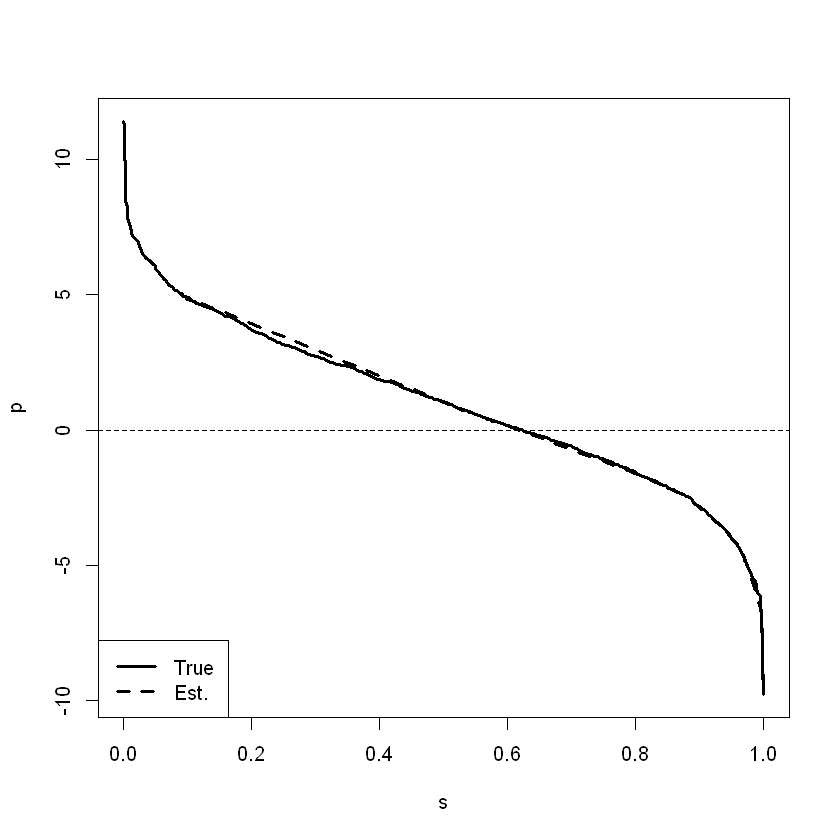

In [2]:
# 5.2.3 Revealing Demand

p <- runif(9,min=-10,max=10)   # nine price points, randomized from -10 to 10
# p

s <- matrix(NA, length(p),1)  # (9x1) NA matrix generate
for (i in 1:length(p)) {
    s[i,1] <- mean(u - p[i] > 0)
}

# plot
plot(1 - ecdf(u)(u), u, type="l", lwd=3, lty=1, col=1,
    xlab="s", ylab="p", xlim=c(0,1))

# ECDF(a)(a) presents the estimated probabilities of a.
lines(sort(s),p[order(s)],type="l",lwd=3,lty=2)

abline(h=0, lty=2)

legend("bottomleft",c("True","Est."), lwd=3, lty=c(1:2))




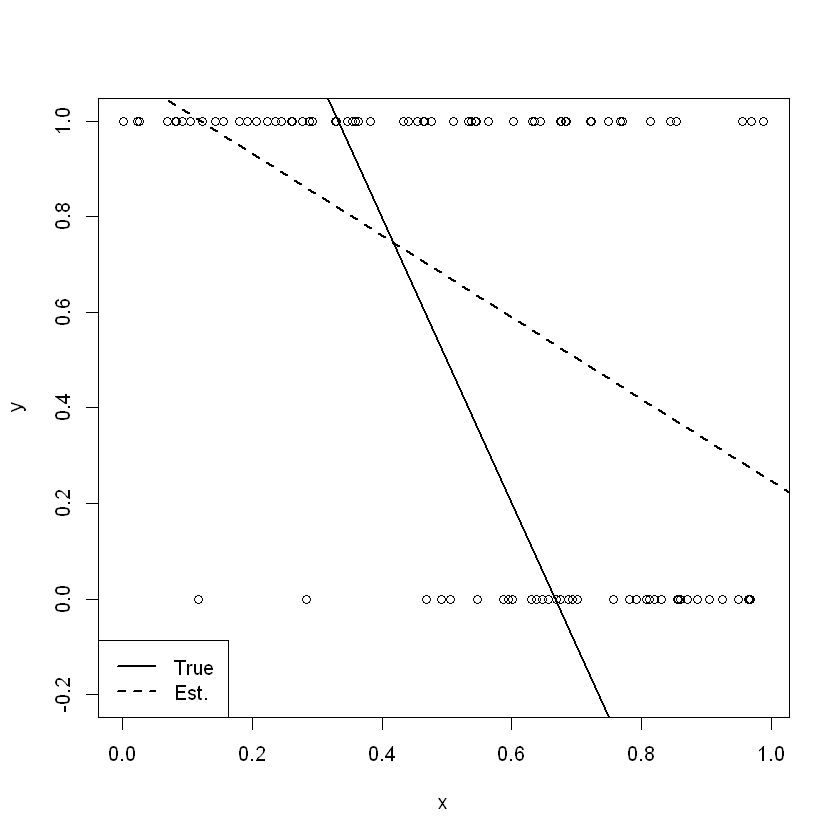

In [3]:
# Simple Discrete Choice Model

set.seed(123456789)

N <- 100
a <- 2
b <- -3
u <- rnorm(N)
x <- runif(N)
y_star <- a + b*x + u
y <- y_star > 0
lm1 <- lm(y~x)

plot(x,y, ylim = c(-0.2,1))
abline(a = 2, b = -3, lwd = 2)
abline(a = lm1$coefficients[1], b =lm1$coefficients[2],
      lty = 2, lwd = 2)
legend("bottomleft", c("True","Est."), lwd =2, lty=1:2)

In [4]:
# 5.4 Maximum Likelihood

# 5.4.1 Binomial Likelihood
# determining whether a coin is fair.

set.seed(123456789)
N <- 100
p <- 0.367 # the true probability of Head
Head <- runif(N) < p
mean(Head)


# calculate the coefficient for the binomial function
choose(100,34)*(0.5^100)

# 5.4.2 Binomial Likelihood in R
# check Equation 5.12
function_binom <- function(p, N, p_hat) {
    return( -( (p_hat*N)*log(p) + (1 - p_hat)*N*log(1-p) ) )
    
    # Note: the negative sign in the return indicates a minimizer in optimize() function    
}

optimize( f = function_binom, interval = c(0,1), N = 100, p_hat = 0.34 )

# optimize( f = function_binom, interval = c(0.5,1), N = 100, p_hat = 0.34 )

p <- c(1:1000)/1000
log_lik <- - function_binom(p, N = 100, p_hat = 0.34)
# note that the function acts on the whole vector
# negative to show maximum likelihood




[1] 0.34

[1] 0.0004581053

$minimum
[1] 0.3399919

$objective
[1] 64.10355

In [5]:
# 5.4.4 Maximum Likelihood OLS in R

# Check Equation 5.18

f_ols_ml <- function(par, y, X) {
    
    X <- cbind(1,X)
    N <- length(y)
    J <- dim(X)[2]
    sigma <- exp(par[1])
    
    # Note that sigma must be positive
    # The exponential function maps from any real number to positive numbers
    # It allows the optimizer to choose any value and transforms that number into a positive value
    
    beta <- par[2:(J+1)]
    z <- (y - X%*%beta)/sigma
    log_lik <- - sum(log(dnorm(z)) - log(sigma))
    return(log_lik)
    
    # Remember we are minimizing here
    
}

a <- optim(par = c(0,2,-3), fn = f_ols_ml, y = y_star, X = x)

# Optim takes in starting values with par, then the function used and then values that the function needs
# Here we cheat by having it start at the true values
# sigma
exp(a$par[1])


# beta
a$par[2:3]

# # start from different starting values yield a similar result
# a <- optim(par = c(0,0,0), fn = f_ols_ml, y = y_star, X = x)

# exp(a$par[1])

# a$par[2:3]

[1] 0.9519634

[1]  1.832333 -2.643751

In [6]:
# 5.4.6 Probit in R
#check Equations 5.19 and 5.20

f_probit <- function(beta, y, X) {
    
    X <- cbind(1,X)
    Xb <- X%*%beta
    log_lik <- (1 - y)*log(pnorm(-Xb)) + y*log(pnorm(Xb))
    return(- sum(log_lik))
    
}

optim(par = lm1$coefficients, fn = f_probit, y = y, X = x)$par


# 5.4.7 Generalized Linear Model
# probit is an example of generalized linear model

glm(y~x, family = binomial(link="probit"))$coefficients

(Intercept)           x 
   2.014153   -2.835234

(Intercept)           x 
   2.014345   -2.835369

In [7]:
# 5.5 McFadden's Random Utility Model

# 5.5.1 Model of Demand

# 5.5.2 Probit and Logit Estimators

# 5.5.3 Simulation with Probit and Logit Estimators
# Check Equation 5.24


#### WARNING!!!! MY CODE DOES NOT RETURN THE CORRECT FIRST AND THIRD PARAMTERS!

set.seed(12345678)
N <- 5000
X_A <- cbind(1, matrix(runif(2*N)),nrow=N)
X_B <- cbind(1, matrix(runif(2*N)),nrow=N)
# here we create two products characteristics matrices

beta <- c(1,-2,3)

### Probit
u_A <- rnorm(N)
y <- X_A%*%beta - X_B%*%beta + u_A > 0

glm1 <- glm(y ~ I(X_A - X_B),
           family = binomial(link="probit"))
# note that I() does mathinside the glm() function
glm1

### Logit
u_A <- log(rweibull(N, shape = 1))
##### Gumbel or TEV1
u_B <- log(rweibull(N, shape = 1))
y <- (X_A%*%beta - X_B%*%beta) + (u_A - u_B) > 0
glm2 <- glm(y ~ I(X_A - X_B), 
           family = binomial(link="logit"))

glm2



Call:  glm(formula = y ~ I(X_A - X_B), family = binomial(link = "probit"))

Coefficients:
     (Intercept)      I(X_A - X_B)      I(X_A - X_B)  I(X_A - X_B)nrow  
        -0.01988                NA          -1.96095                NA  

Degrees of Freedom: 9999 Total (i.e. Null);  9998 Residual
Null Deviance:	    13860 
Residual Deviance: 10860 	AIC: 10860


Call:  glm(formula = y ~ I(X_A - X_B), family = binomial(link = "logit"))

Coefficients:
     (Intercept)      I(X_A - X_B)      I(X_A - X_B)  I(X_A - X_B)nrow  
      -1.115e-05                NA        -2.017e+00                NA  

Degrees of Freedom: 9999 Total (i.e. Null);  9998 Residual
Null Deviance:	    13860 
Residual Deviance: 12440 	AIC: 12450

In [8]:
# 5.6 Multinomial Choice

# 5.6.1 Multinomial Choice Model

# 5.6.2 Multinomial Probit

# 5.6.3 Multinomial Probit in R

f_biprobit <- function(par, y, W1, W2, K = 10) {
    
    # K is a counter for the number of draws from the normal distribution
    # - more draws gives greater accuracy
    # but slower computation times
    
    # function setup
    
    set.seed(123456789)
    epsilon <- 1e-20                # used below to make sure the logs work
    
    W1 <- cbind(1,W1)
    W2 <- cbind(1,W2)
    N <- dim(y)[1]                # note that y is a matrix
    J <- dim(W1)[2]
    rho <- exp(par[1])/( 1 + exp(par[1]) )
    
    # the "sigmoid" function that keeps value between 0 and 1
    # It assumes that the correlation is positive
    beta <- par[2:(J+1)]
    
    # Integration to find the probabilities
    u <- rnorm(K)
    p_00 <- p_10 <- rep(0,N)
    
    for (u_k in u) {
        u_k0 <- u_k < -W1%*%beta
        p_00 <- p_00 + u_k0*pnorm( ( -W2%*%beta - rho*u_k )/( (1 - rho^2)^(.5) ) )   # check Equation 5.31
        p_10 <- p_10 + ( 1 - u_k0 )*pnorm( ( (W1-W2)%*%beta + (1-rho)*u_k )/( (1 - rho^2)^(.5) ) )
    }
    
    # determine the likelihood
    log_lik <- ( y[,1]==0 & y[,2]==0 )*log(p_00/K + epsilon) + 
                ( y[,1]==1 & y[,2]==0 )*log(p_10/K + epsilon) +
                ( y[,1]==0 & y[,2]==1 )*log(1 - p_00/K - p_10/K + epsilon)
    
    return(-sum(log_lik))
    
}

In [9]:
# 5.6.4 Multinomial Logit

# 5.6.5 Multinomial Logit in R
# check Equation 5.33

f_logit <- function(beta, y, W1, W2) {
    epsilon <- 1e-20
    W1 <- as.matrix(cbind(1,W1))
    W2 <- as.matrix(cbind(1,W2))
    W1b <- W1%*%beta
    W2b <- W2%*%beta
    p_10 <- exp( W1b )/( 1 + exp(W1b) + exp(W2b) )
    p_01 <- exp( W2b )/( 1 + exp(W1b) + exp(W2b) )
    p_00 <- 1 - p_10 - p_01
    
    log_lik <- ( y[,1]==0 & y[,2]==0 )*log(p_00 + epsilon) +
                ( y[,1]==1 & y[,2]==0 )*log(p_10 + epsilon) +
                ( y[,1]==0 & y[,2]==1 )*log(p_01 + epsilon)
    
    return(-sum(log_lik))
}

In [10]:
# 5.6.6 Simulating Multinomial Choice

require(mvtnorm)
# this package creates multivariate normal distributions

set.seed(123456789)
mu <- c(0,0)
rho <- 0.1           # correlation parameter
Sigma <- cbind(c(1,rho), c(rho,1))

# N x 2
u <- rmvnorm(N, mean = mu, sigma = Sigma)

# relative unobserved charateristics of two choices
x1 <- matrix(runif(N*2),nrow=N)
x2 <- matrix(runif(N*2),nrow=N)
# creates matrix of N x 2 random numbers

# relative observed characteristics of two choices
a <- -1
b <- -3
c <- 4
U <- a + b*x1 + c*x2 + u
y <- matrix(0,N,2)
y[,1] <- U[,1] > 0 & U[,1] > U[,2]
y[,2] <- U[,2] > 0 & U[,2] > U[,1]


par <- c(log(rho), a,b,c)
W1 <- cbind(x1[,1], x2[,1])
W2 <- cbind(x1[,2], x2[,2])
start_time <- Sys.time()

a1 <- optim(par = par,
           fn = f_biprobit,
           y = y,
           W1 = W1,
           W2 = W2,
           K = 100, 
           control = list(trace=0, maxit=1000))

# time of f_biprobit
Sys.time() - start_time

a1$par[2:4]           # far better than multinomial logit!!

Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"

Time difference of 41.43295 secs

[1] -0.8065074 -2.5465474  3.2934327

In [11]:
par <- c(a,b,c)
start_time <- Sys.time()

b1 <- optim(par = par,
           fn = f_logit,
           y = y,
           W1 = W1, 
           W2 = W2,
           control = list(trace=0, maxit=1000))
# time of f_logit
Sys.time() - start_time

b1$par[1:3]           # really bad!

# this is not surprising since the assumptions of the model do not hold in the simulated data
# but it gets the result real quick

Time difference of 0.371654 secs

[1] -1.578207 -4.779715  6.545525

In [12]:
# 5.7 Demand for Rail

# 5.7.1 National Household Travel Survey

## Data and Creating Variables
x <- read.csv("C:/Users/Regi Kusumaatmadja/Dropbox/TI Microeconometrics Julia, R and Matlab/Julia - Microeconometrics R/hhpub.csv", as.is=TRUE)

x$choice <- NA
x$choice <- ifelse(x$CAR==1, "car", x$choice)
x$choice <- ifelse(x$BUS==1, "bus", x$choice)
x$choice <- ifelse(x$TRAIN==1, "train", x$choice)

# Note that this overrules the previous choice
x$car1 <- x$choice == "car"
x$train1 <- x$choice == "train"

# Adjusting variables to account for missing
x$home <- ifelse(x$HOMEOWN==1, 1, NA)
x$home <- ifelse(x$HOMEOWN>1, 0, x$home)
# home ownership

x$income <- ifelse(x$HHFAMINC > 0, x$HHFAMINC, NA)
# household income

x$density <- ifelse(x$HTPPOPDN==-9, NA, x$HTPPOPDN)/1000
# missing is -9
# population density
# dividing by 1000 makes the reported results look nicer

x$urban1 <- x$URBAN==1   # urban versus rural
y <- x[x$WRKCOUNT > 0 & (x$MSACAT == 1 | x$MSACAT == 2),]
# limit to households that may commute and those that live in some type of city

y$rail <- y$RAIL == 1
# an MSA with rail

index_na <- is.na(rowSums( cbind(y$car1, y$train1, 
                                y$home, y$HHSIZE, y$income,
                                y$urban1, y$density, y$MSACAT,
                                y$rail) ))==0

y <- y[index_na,] # drop missing


vars <- c("car1", "train1","home","HHSIZE","income","urban1","density")
summ_tab <- matrix(NA, length(vars),2)
for (i  in 1:length(vars)) {
    summ_tab[i,1] <- mean(y[y$rail==1, colnames(y)==vars[i]])
    summ_tab[i,2] <- mean(y[y$rail==0, colnames(y)==vars[i]])
}

row.names(summ_tab) <- vars
colnames(summ_tab) <- c("Rail","No Rail")
summ_tab

,Rail,No Rail
car1,0.87792498,0.97386146
train1,0.09661046,0.01003613
home,0.73012732,0.74923056
HHSIZE,2.48786992,2.46242027
income,7.51884033,7.05455194
urban1,0.91027185,0.86975333
density,7.55907605,4.66193630


In [14]:
# 5.7.2 Demand for Cars
# Without Rail
y_nr <- y[y$rail==0,]
glm_nr <- glm(car1 ~ home + HHSIZE + income + urban1 + density, data = y_nr,
             family = binomial(link=logit))

# With Rail
y_r <- y[y$rail == 1,]
glm_r <- glm(car1 ~ home + HHSIZE + income + urban1 + density, data = y_r,
            family = binomial(link=logit))

# y_res <- c(y_nr, y_r)

# stargazer(list(y_res))